# quick demo of `hodalpt.sims.alpt` module

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from hodalpt.sims import alpt as CS

import os


# run CS to generate ALPT DM

In [11]:
fconfig = '/Users/mcc3842/CosmicSim2025/CosmicSignal4SimBIG/boxes/config_file.ini'#'/Users/hahnchanghoon/projects/CosmicSignal4SimBIG/boxes/config_file.ini'
outdir = '/Users/mcc3842/CosmicSim2025/data/quijote/fiducial/1/alpt/'#'/Users/hahnchanghoon/data/simbig/quijote/fiducial/1/alpt'


In [12]:
xyz = CS.CSbox_alpt(fconfig, outdir, seed=0, make_ics=True, silent=False)

Computing and writing out delta IC
Computing displacement fields at z=0.5
Compiled with MULTITHREAD support, with 10 threads
 >>> web-on: initialising settings....

---> attention: N1= 256
---> attention: redshift= 0


 >>> starting web-on  ...

 >>> web-on initialising cosmological model....

number of chosen redshift snapshots = 1
... writing file posx.dat
... writing file posy.dat
... writing file posz.dat
... writing file posorx.dat
... writing file posory.dat
... writing file posorz.dat
... writing file posor0x.dat
... writing file posor0y.dat
... writing file posor0z.dat
... reading file Quijote_ICs_delta_z127_n256_CIC.DAT
... writing file deltaICOM0.317OL0.683G256V1000.0.dat
... writing file auxreal.dat
... writing file auxim.dat
 >>> dump power-spectrum in : pk_deltaICOM0.317OL0.683G256V1000.0.dat
-->  sample velocity;  z_min, z_max: 0.5  0.5 
... writing file VEZELDx.dat
... writing file VEZELDy.dat
... writing file VEZELDz.dat
-->  calculate values for: 1 snapshots
redshift=0

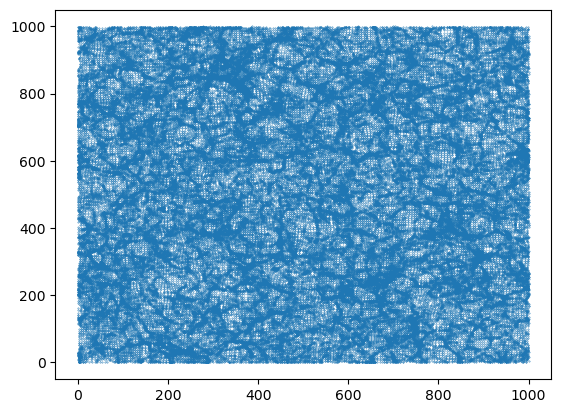

In [13]:
x, y, z = xyz.T
zslice = (z > 100) & (z < 110)
plt.scatter(x[zslice], y[zslice], s=0.1)

# run CS bias model

In [14]:
# arbitrary parameters
# make not arbitrary 
theta_gal = {
    'alpha': 1.9230, 
    'beta': 2.0253, 
    'dth': -0.7889, 
    'rhoeps': 14.6874, 
    'eps': 0.5616, 
    'nmean': 3.3e-4}
theta_rsd = {
    'bv': 0.7289, 
    'bb': 1.1652,
    'betarsd': 1.3136, 
    'gamma': 0.4944}

In [15]:
xyz_g = CS.CSbox_galaxy(theta_gal, theta_rsd, outdir, silent=False)

OM0.317OL0.683G256V1000.0_ALPTrs5.000z0.500.dat
Omega_m 0.317000
Reading input ...
Getting number counts via parametric bias ...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Number counts diagnostics (min, max, mean):  0.0 14.0 0.019673287868499756
Preparing galaxy positions ...
Sampling galaxy positions ...
-->Find starting indices ...
-->Start loop over cells of the mesh ...
apply RSD ...


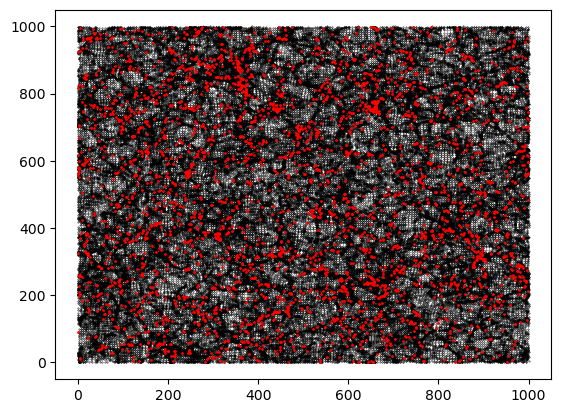

In [16]:
zslice = (z > 100) & (z < 110)
plt.scatter(x[zslice], y[zslice], s=0.1, c='k')

x0, y0, z0 = xyz_g.T
zslice0 = (z0 > 100) & (z0 < 110)
plt.scatter(x0[zslice0], y0[zslice0], s=1, c='r')

In [ ]:
from hodalpt import stats

spec = stats.Pk_periodic(xyz_g.T, Lbox=1000, Ngrid=256, Nmubin=20, fft='pyfftw', silent=False, rsd=2)

------------------
330063 positions in 1000 box
nbar = 0.000330
330063 positions, Ntot=330063
positions assigned to grid
position grid FFTed
fcomb complete
--- correcting for shotnoise ---


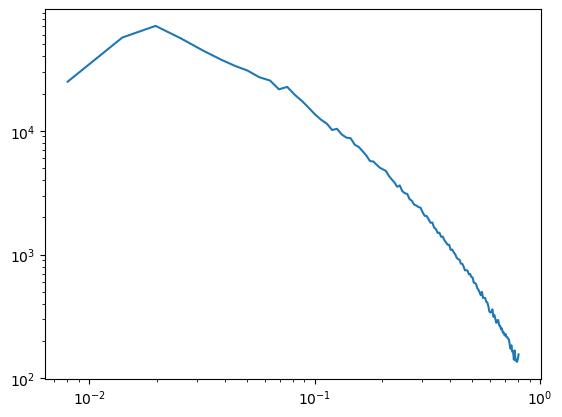

In [26]:
plt.plot(spec['k'], spec['p0k'])
plt.yscale('log')
plt.xscale('log')